
Welcome to the world of e-commerce, where customer feedback is a goldmine of insights! In this project, we'll dive into the Women's Clothing E-Commerce Reviews dataset, focusing on the 'Review Text' column filled with direct customer opinions.

Our mission is to use text embeddings and Python to analyze these reviews, uncover underlying themes, and understand customer sentiments. This analysis will help improve customer service and product offerings.

## The Data

we will be working with a dataset specifically focusing on customer reviews. Below is the data dictionary for the relevant field:

## womens_clothing_e-commerce_reviews.csv

| Column        | Description                           |
|---------------|---------------------------------------|
| `'Review Text'` | Textual feedback provided by customers about their shopping experience and product quality. |

Armed with access to powerful embedding API services, we will process the reviews, extract meaningful insights, and present our findings.

Let's get started!



## Before you start

In order to complete the project, we may need to use the OpenAI API.

### Create a developer account with OpenAI

1. Go to the [API signup page](https://platform.openai.com/signup).

2. Create your account (you'll need to provide your email address and your phone number).


3. Go to the [API keys page](https://platform.openai.com/account/api-keys).

4. Create a new secret key.


5. **Take a copy of it**. (If you lose it, delete the key and create a new one.)

In [ ]:
!pip install openai
!pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 525.5/525.5 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 10.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.9/698.9 kB 

## Load OpenAI API key from environment variables
These variables can be referenced globally throughout the project while keeping their values secret. Good for setting passwords in credentials.

In [ ]:
# Initialize your API key
import os
# use your openai api key
from getpass import getpass

OPENAI_API_KEY = getpass()

os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY # give your api key below

··········


## Install useful libraries

In [ ]:
import openai
from openai import OpenAI

In [ ]:
import chromadb

In [ ]:
from openai import OpenAI
import os
import openai
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import chromadb
from scipy.spatial import distance
from chromadb.utils.embedding_functions import OpenAIEmbeddingFunction

## Load the dataset
Load data and perform basic data checks to ensure you are using relevant data for the analysis

In [ ]:
# Load the dataset
import pandas as pd
reviews = pd.read_csv("/content/women_clothing_e-commerce_reviews.csv")

# Display the first few entries
reviews.head()

,Review ID,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


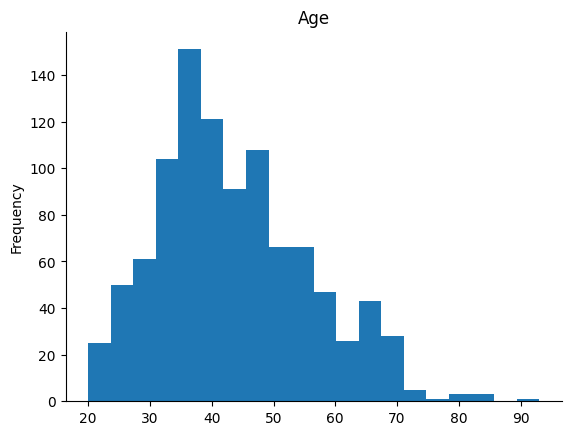

In [ ]:
# @title Age

from matplotlib import pyplot as plt
reviews['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

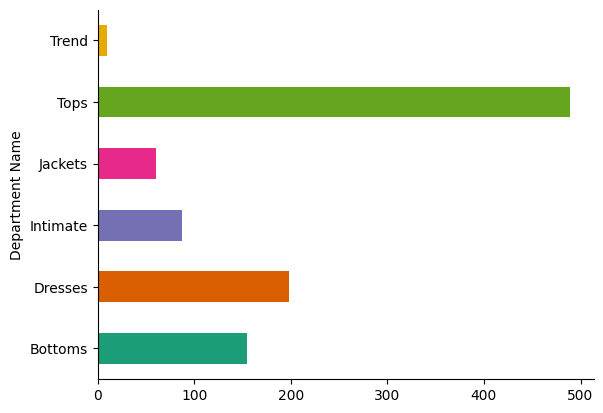

In [ ]:
# @title Department Name

from matplotlib import pyplot as plt
import seaborn as sns
reviews.groupby('Department Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
### chcking for null
#reviews['Review Text'].size
#reviews['Review Text'].isnull().size

1000

## OPENAI Embeddings

In [ ]:
text_review=reviews['Review Text'].dropna()

In [ ]:
# Start coding here
# Use as many cells as you need.
client = openai.OpenAI(api_key=OPENAI_API_KEY)
#OPENAI_API_KEY
# Create a request to obtain embeddings
#response = client.embeddings.create(model='text-embedding-ada-002',input=review)


responses=client.embeddings.create(input=text_review.tolist(),model="text-embedding-ada-002").model_dump()
embeddings = [response["embedding"] for response in responses["data"]]


In [ ]:
print(responses.keys())

dict_keys(['data', 'model', 'object', 'usage'])


dict

## Dimension Reductiobn

In [ ]:
# Apply t-SNE for dimensionality reduction
def apply_tsne(embeddings):
    tsne = TSNE(n_components=2, random_state=0)
    return tsne.fit_transform(embeddings)

embeddings_2d = apply_tsne(np.array(embeddings))

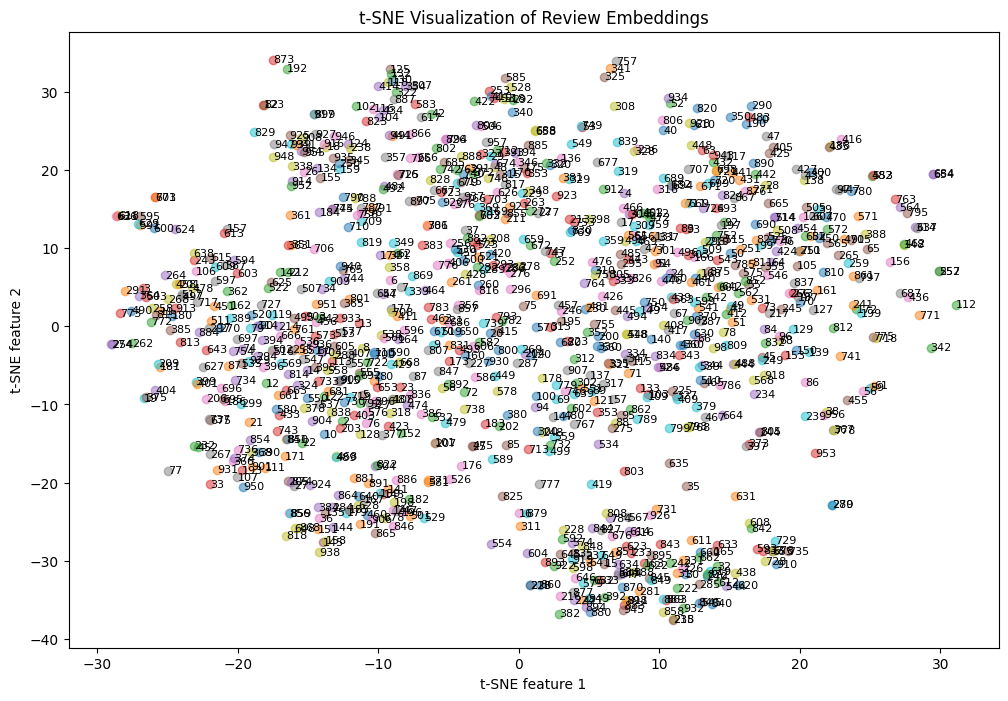

In [ ]:
# Plotting the results of t-SNE
def plot_tsne(tsne_results):
    plt.figure(figsize=(12, 8))
    for i, point in enumerate(tsne_results):
        plt.scatter(point[0], point[1], alpha=0.5)
        plt.text(point[0], point[1], str(i), fontsize=8, verticalalignment='center')
    plt.title("t-SNE Visualization of Review Embeddings")
    plt.xlabel("t-SNE feature 1")
    plt.ylabel("t-SNE feature 2")
    plt.show()
plot_tsne(embeddings_2d)

## Defining topics/Categories

In [ ]:
# Define topics
categories = ["Quality", "Fit", "Style", "Comfort"]
# Create embeddings for all categories in one API call
category_responses = client.embeddings.create(input=categories,model="text-embedding-ada-002").model_dump()

# Extract embeddings from the responses and map them to their respective categories
category_embeddings = [embedding["embedding"] for embedding in category_responses["data"]]


## Initiate the vector searcha nd similarity feedback

In [ ]:
# Initialize Chromadb instance for vector storage
client = chromadb.PersistentClient()

# Define vector database with get_or_create flag to avoid UniqueConstraintError
review_embeddings_db = client.create_collection(
    name="review_embeddings",
    embedding_function=OpenAIEmbeddingFunction(api_key=OPENAI_API_KEY),
    get_or_create=True)  # Added get_or_create=True to handle existing collection

# Store embeddings inside vector database
review_embeddings_db.add(
    documents=text_review.tolist(),
    ids=[str(i) for i in range(len(text_review))]
)

# Function for similarity search using vector db query function
def find_similar_reviews(input_text, vector_db, n=3):
    collection = client.get_collection(
        name="review_embeddings",
        embedding_function=OpenAIEmbeddingFunction(api_key=OPENAI_API_KEY))
    results = collection.query(
        query_texts=[input_text],
        n_results=n
    )
    return results

# Example feedback and finding similar feedback
example_review = "Absolutely wonderful - silky and sexy and comfortable"
most_similar_reviews = find_similar_reviews(example_review, review_embeddings_db, 3)["documents"][0]
print(most_similar_reviews)

# Clean up
#client.delete_collection(name="review_embeddings")

['Absolutely wonderful - silky and sexy and comfortable', 'Very comfortable and versatile. got lots of compliments.', 'Loved this top. great design. comfortable and unique. soft material']


In [ ]:
# Example feedback and finding similar feedback
example_review = "THIS IS SO BAD"
most_similar_reviews = find_similar_reviews(example_review, review_embeddings_db, 3)["documents"][0]
print(most_similar_reviews)


['This is so thin and poor quality. especially for the price. it felt like a thin pajama top. the buttons are terrible little shell buttons. this could not have been returned faster.', 'The sweater is cute, but scratchy.', 'This top is soo pretty with a cool edge.\nit looks and feels like really good quality.']


In [ ]:
# Example feedback and finding similar feedback
example_review = "THIS PANTS ARE IN VERY POOR QUALITY"
most_similar_reviews = find_similar_reviews(example_review, review_embeddings_db, 3)["documents"][0]
print(most_similar_reviews)


['This is so thin and poor quality. especially for the price. it felt like a thin pajama top. the buttons are terrible little shell buttons. this could not have been returned faster.', "I loved the cut of these pants and the button accent on the pockets. however, the material was quite thin and the quality was not great- there were multiple snags along the seams. additionally, at 5'8, 130lbs i was swimming in the size 4. i would have tried sizing down if the quality was better.", "I love the fit of these pants -- they're the perfect slim black pants. however, i wore these pants exactly three times before the seams split the middle of the pant in not just one, but multiple places. disappointed by the workmanship/quality of the product, especially since the pants fit amazingly and don't sag like other slim fitting black pants tend to do. i hope retailer will take this into consideration and improve the quality of future iterations of this product."]


In [ ]:
# Example feedback and finding similar feedback
example_review = "THIS TOP IS SO FREAKING BEAUTIFUL AND LOVELY"
most_similar_reviews = find_similar_reviews(example_review, review_embeddings_db, 3)["documents"][0]
print(most_similar_reviews)

['This top is soo pretty with a cool edge.\nit looks and feels like really good quality.', 'This top is gorgeous and versatile. i wear it with jeans and dress it up with a skirt. so happy to have this in my wardrobe.', 'Loved this top. great design. comfortable and unique. soft material']
